# 4. Fingerprinting
 * Working with (relatively distributed) local spectrogtram maxima
 * Create pairs of features
  * pick "neighboring" points
  * $(f_1, f_2, t_2-t_1), t_1\\ (f_1, f_3, t_3-t_1), t_1\\ \vdots \\ n_{fanout}$
 * Create **database** dictionary
  * $(f_n, f_{n+1}, t_{n+1}-t_n) \to (song\_id, t_{fingerprint})$

### At runtime:
 * Analyze sample
 * Look up fingerprints in database
 * Count the number of same offsets in same song

song | $\Delta$ t | matches
--- | --- | ---
song_1 | 29 | 150
song_2 | 3 | 10
song_2 | 1 | 3

 * Choose the top match

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from fingerprinting import fingerprints

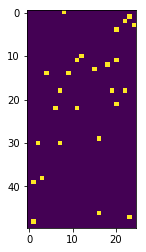

In [2]:
# Dummy peak array
spec = np.random.random((50, 25)) > 0.98

fig, ax = plt.subplots()
ax.imshow(spec)

In [3]:
fingerprints(spec).shape

(115, 2)